**Import Packages**

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [89]:
data = pd.read_csv("/content/train-chennai-sale.csv")
data.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# **Data Cleaning**
**Handling Missing Values**

In [90]:
data.isna().sum()


PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [91]:
data.loc[data['N_BEDROOM'].isna()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
4060,P01066,Anna Nagar,1556,16-01-2013,181,NaN,1.0,4,Partiall,No,...,NoSewr,No Access,RM,4.8,2.7,2.0,3.155,313136,107978,10797790


In [92]:
data['N_BEDROOM'].fillna(data['N_BEDROOM'].mode()[0],inplace=True)


In [93]:
data.loc[data['N_BATHROOM'].isna()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,22-03-2010,39,1.0,NaN,4,Partial,No,...,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,451857,85486,12212350
5087,P01333,Chrompet,1016,02-08-2012,105,1.0,NaN,3,AbNormal,Yes,...,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,330086,106479,10647920
6134,P01332,Chormpet,916,02-08-2012,173,1.0,NaN,3,Normal Sale,Yes,...,ELO,Paved,RL,3.4,3.5,3.0,NaN,265423,44237,8847420
6371,P01189,Chrompet,1035,06-11-2012,90,1.0,NaN,3,Partial,No,...,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,223403,24823,8274200
6535,P09189,Anna Nagar,1864,05-03-2007,184,2.0,NaN,5,Family,Yes,...,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,575606,124455,15556920


In [94]:
data['N_BATHROOM'].fillna(data['N_BATHROOM'].mode()[0],inplace=True)

In [95]:
data.loc[data['N_BATHROOM'].isna()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


In [96]:
data['QS_OVERALL'] =  data['QS_OVERALL'].fillna(data['QS_OVERALL'].mean())

In [97]:
data.QS_OVERALL.isna().sum()

0

**Drop Duplicates**

In [98]:
data.drop_duplicates().shape

(7109, 22)

**Correct spellings**

In [99]:
print(data['AREA'].unique())
print(data['SALE_COND'].unique())
print(data['PARK_FACIL'].unique())
print(data['BUILDTYPE'].unique())
print(data['UTILITY_AVAIL'].unique())
print(data['STREET'].unique())
print(data['MZZONE'].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
['Yes' 'No' 'Noo']
['Commercial' 'Others' 'Other' 'House' 'Comercial']
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [100]:
data['AREA']=data['AREA'].replace(['Chrompt','Chrmpet','Chormpet'],'Chrompet')

In [101]:
data['AREA']=data['AREA'].replace(['Karapakam'],'Karapakkam')
data['AREA']=data['AREA'].replace(['Ana Nagar','Ann Nagar'],'Anna Nagar')
data['AREA']=data['AREA'].replace(['Adyr'],'Adyar')
data['AREA']=data['AREA'].replace(['KKNagar'],'KK Nagar')
data['AREA']=data['AREA'].replace(['TNagar'],'T Nagar')
data['AREA']=data['AREA'].replace(['Velchery'],'Velachery')

In [102]:
data['SALE_COND']=data['SALE_COND'].replace(['Ab Normal'],'AbNormal')
data['SALE_COND']=data['SALE_COND'].replace(['Partiall','PartiaLl'],'Partial')
data['SALE_COND']=data['SALE_COND'].replace(['Adj Land'],'AdjLand')



In [103]:
data['PARK_FACIL']=data['PARK_FACIL'].replace('Noo','No')

In [104]:
data['BUILDTYPE']=data['BUILDTYPE'].replace('Comercial','Commercial')
data['BUILDTYPE']=data['BUILDTYPE'].replace('Other','Others')

In [105]:
data['UTILITY_AVAIL']=data['UTILITY_AVAIL'].replace(['NoSewr ','NoSeWa'],'NoSewa')
data['UTILITY_AVAIL']=data['UTILITY_AVAIL'].replace('All Pub','AllPub')

In [106]:
data['STREET']=data['STREET'].replace('Pavd','Paved')
data['STREET']=data['STREET'].replace('NoAccess','No Access')


In [107]:
print(data['AREA'].unique())
print(data['SALE_COND'].unique())
print(data['PARK_FACIL'].unique())
print(data['BUILDTYPE'].unique())
print(data['UTILITY_AVAIL'].unique())
print(data['STREET'].unique())
print(data['MZZONE'].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']
['Yes' 'No']
['Commercial' 'Others' 'House']
['AllPub' 'ELO' 'NoSewa']
['Paved' 'Gravel' 'No Access']
['A' 'RH' 'RL' 'I' 'C' 'RM']


**Drop uncessary columns**

In [108]:
data = data.drop(['PRT_ID','REG_FEE','COMMIS'],axis=1)

**Change datatype format**

In [109]:
data.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

In [110]:
data['DATE_SALE'] = data['DATE_SALE'].astype('datetime64[ns]')
data['DATE_BUILD'] = data['DATE_BUILD'].astype('datetime64[ns]')

In [111]:
data['N_BATHROOM'] = data['N_BATHROOM'].astype(int)
data['N_BEDROOM'] = data['N_BEDROOM'].astype(int)

In [112]:
data.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
dtype: object

**Create new feature(age of the building) using DATE_BUILD AND DATE_SALE features**

In [113]:
data['PROPERTY_AGE'] = pd.DatetimeIndex(data['DATE_SALE']).year - pd.DatetimeIndex(data['DATE_BUILD']).year

**Drop DATE_BUILD AND DATE_SALE feature**

In [114]:
data=data.drop(['DATE_BUILD','DATE_SALE'],axis=1)

**Check for outliers**

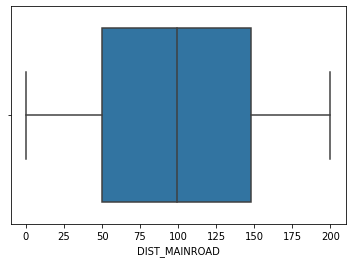

In [115]:
sns.boxplot(data['DIST_MAINROAD'])

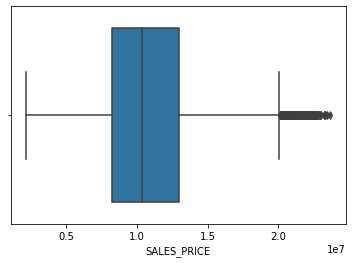

In [116]:
sns.boxplot(data['SALES_PRICE'])

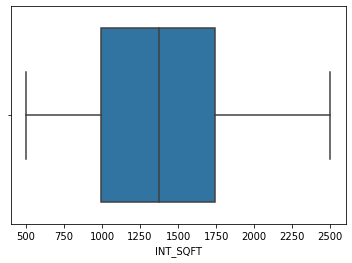

In [117]:
sns.boxplot(data['INT_SQFT'])

Since outliers are necessary for this dataset we are not going to remove outliers

**Exploratory data analysis**

Distribution of features

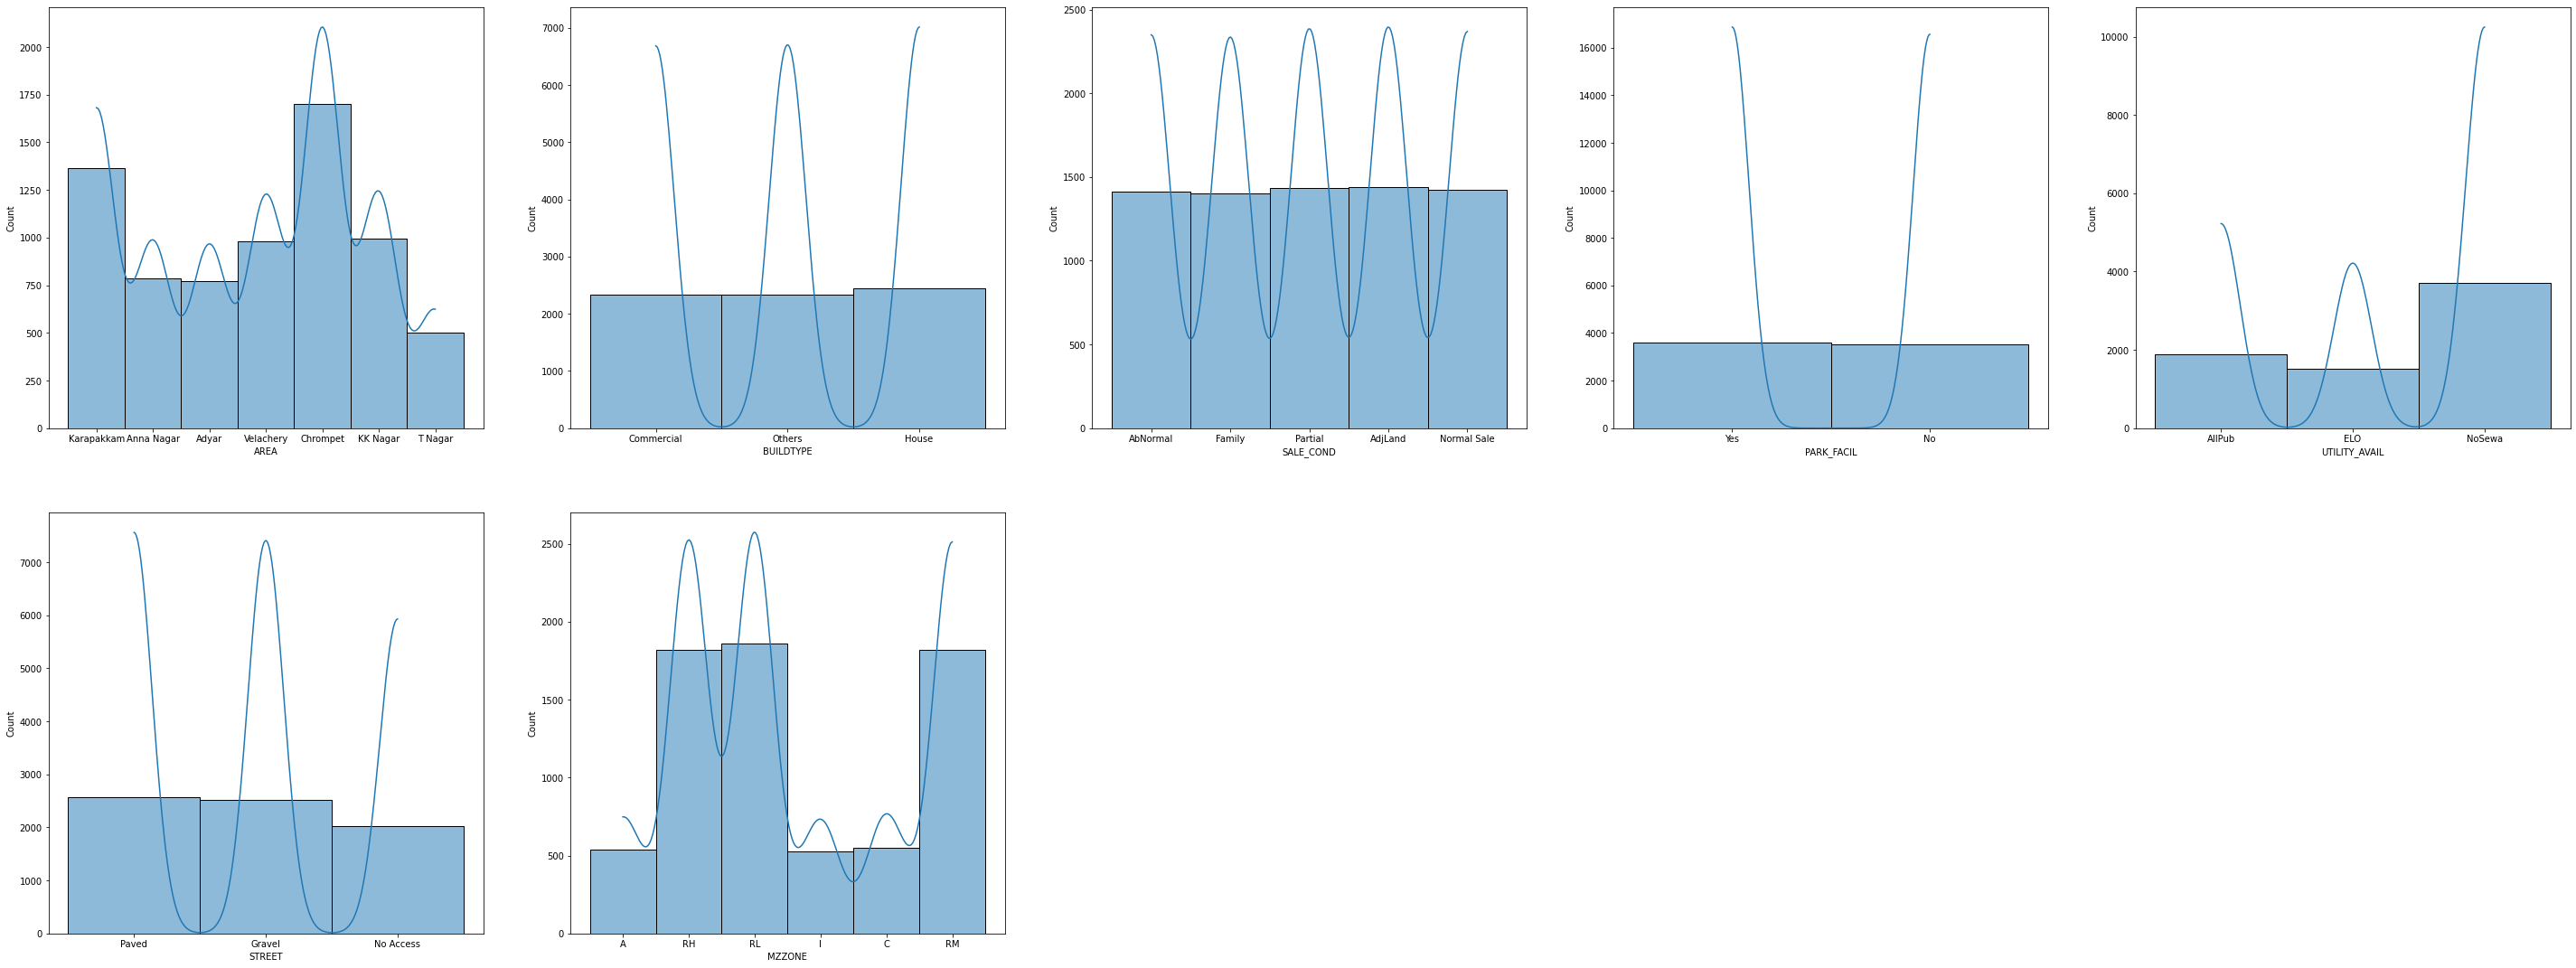

In [118]:
plt.figure(figsize=(50,60))
plt.subplot(6,5,1)
sns.histplot(data['AREA'],kde=True)
plt.subplot(6,5,2)
sns.histplot(data['BUILDTYPE'],kde=True)
plt.subplot(6,5,3)
sns.histplot(data['SALE_COND'],kde=True)
plt.subplot(6,5,4)
sns.histplot(data['PARK_FACIL'],kde=True)
plt.subplot(6,5,5)
sns.histplot(data['UTILITY_AVAIL'],kde=True)
plt.subplot(6,5,6)
sns.histplot(data['STREET'],kde=True)
plt.subplot(6,5,7)
sns.histplot(data['MZZONE'],kde=True)


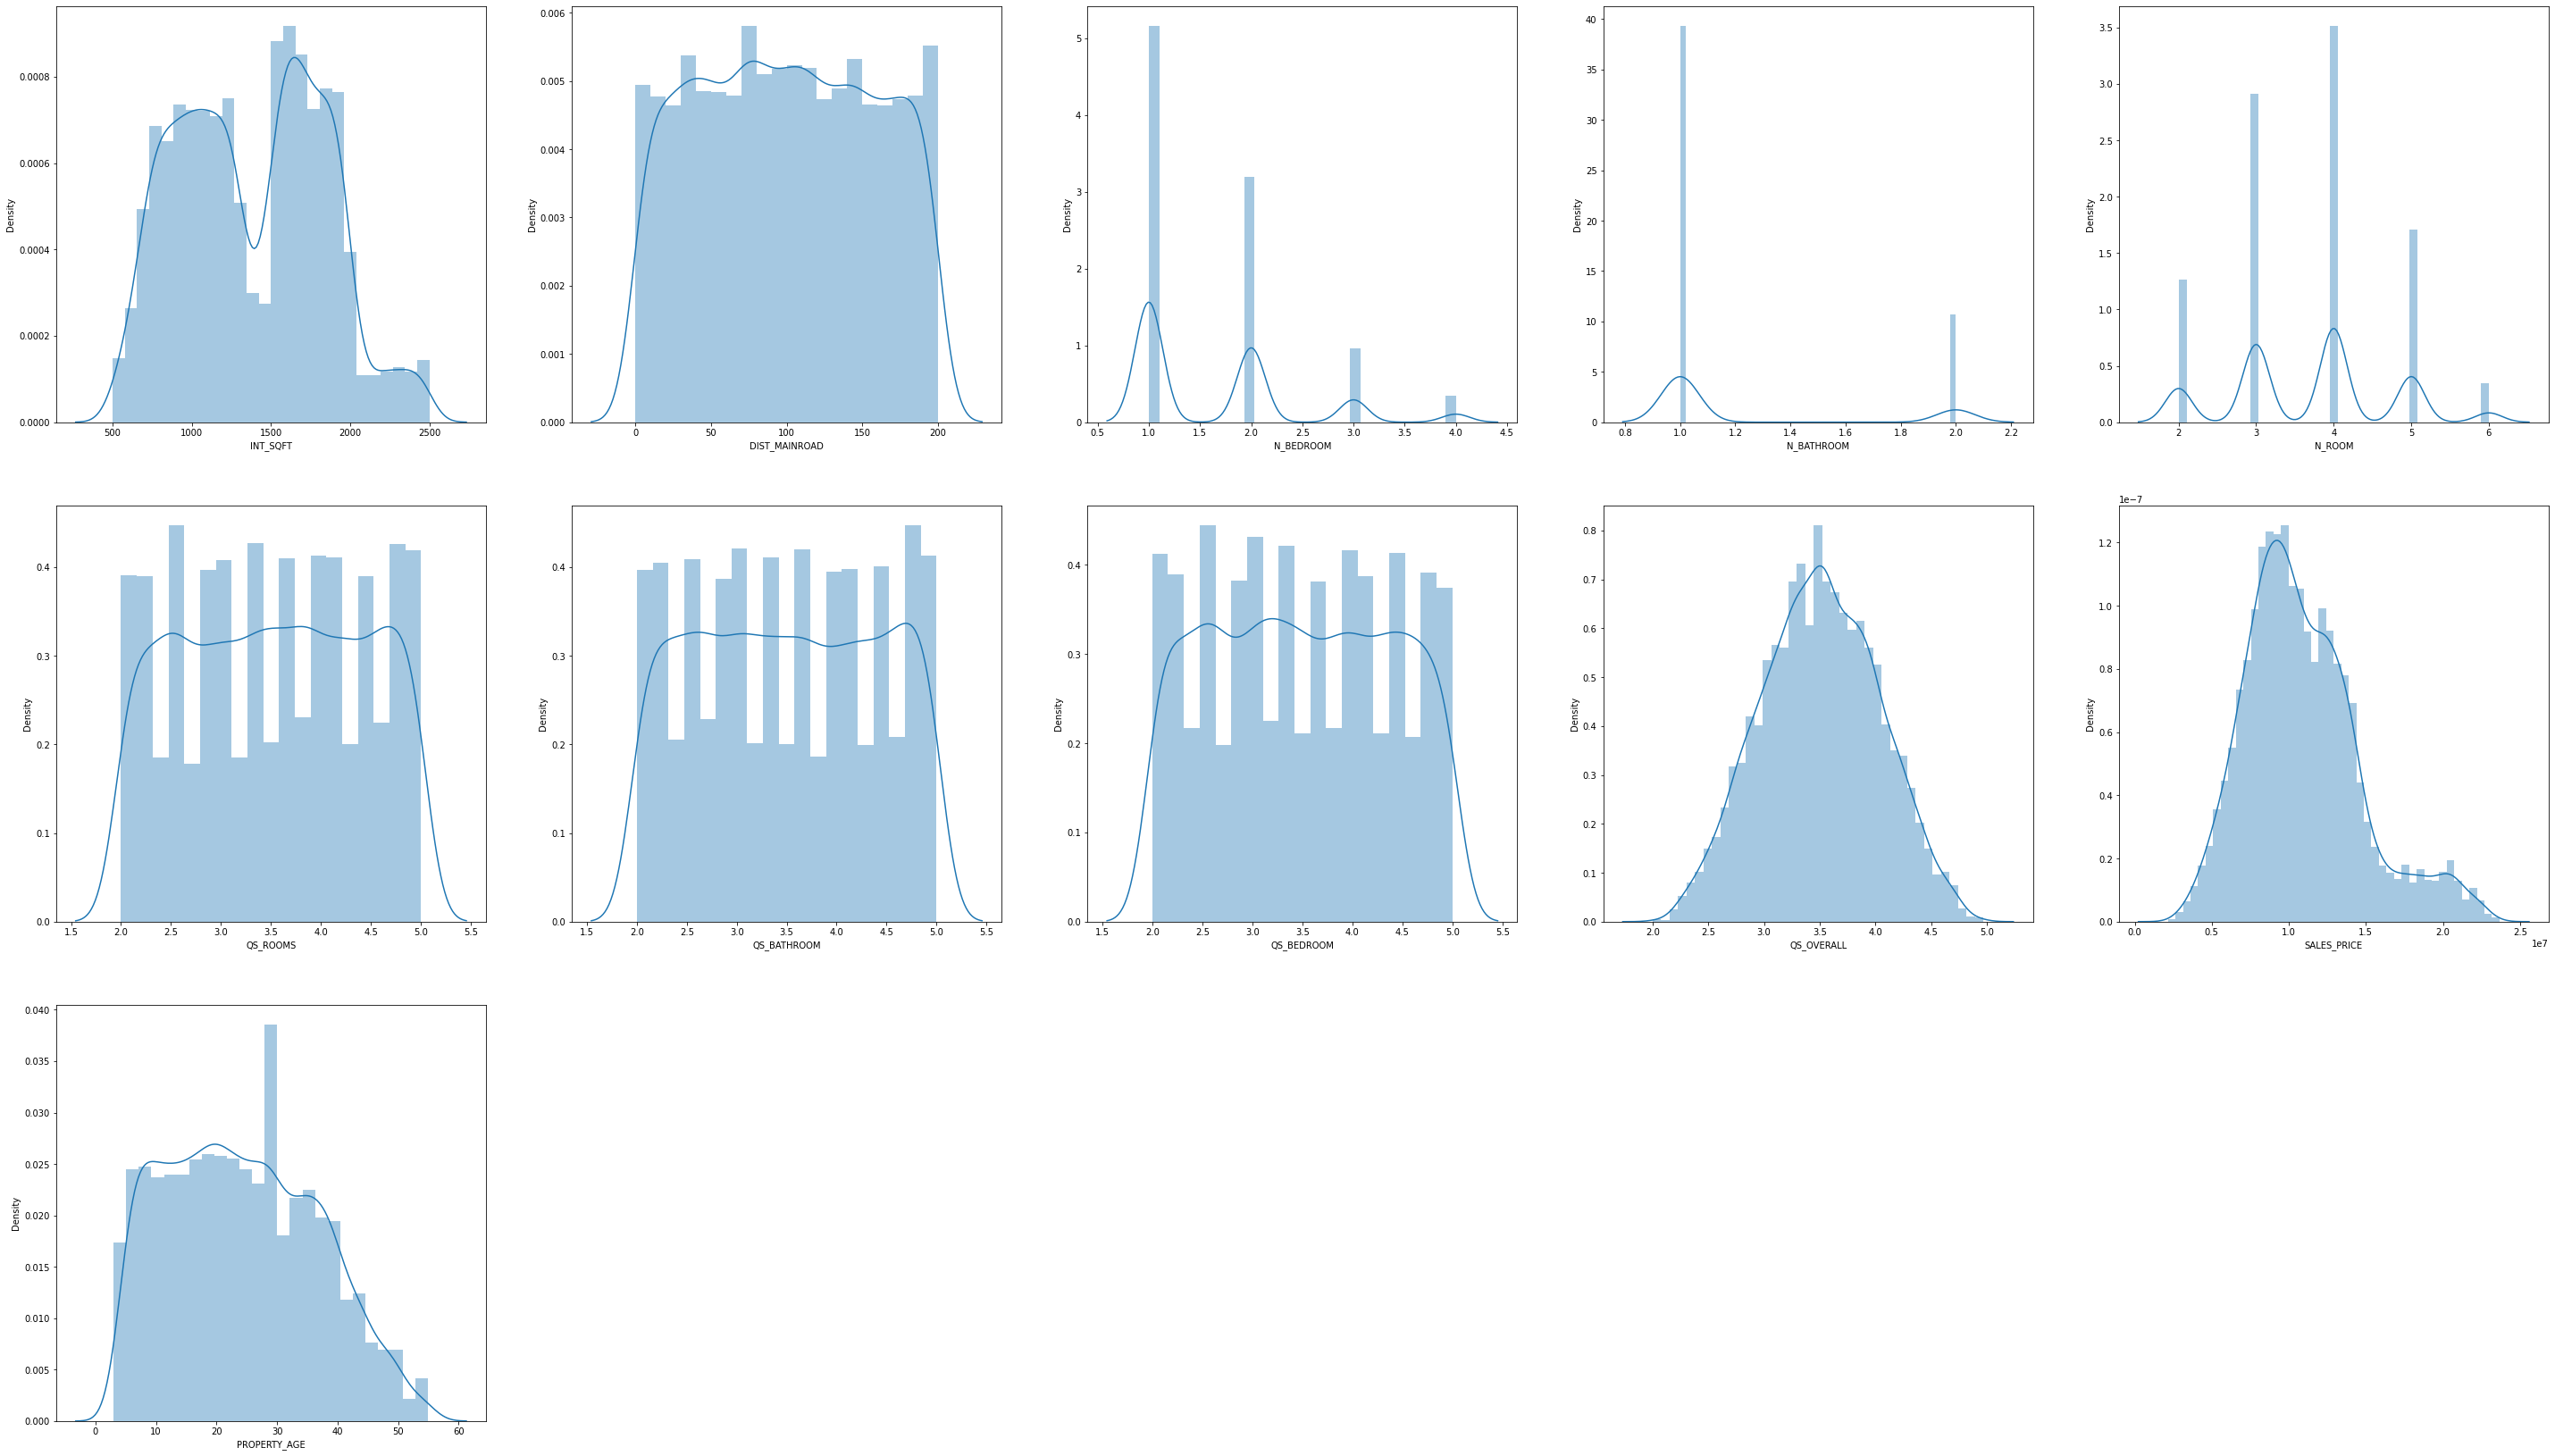

In [119]:
plt.figure(figsize=(50,60))
plt.subplot(6,5,1)
sns.distplot(data['INT_SQFT'])
plt.subplot(6,5,2)
sns.distplot(data['DIST_MAINROAD'])
plt.subplot(6,5,3)
sns.distplot(data['N_BEDROOM'])
plt.subplot(6,5,4)
sns.distplot(data['N_BATHROOM'])
plt.subplot(6,5,5)
sns.distplot(data['N_ROOM'])
plt.subplot(6,5,6)
sns.distplot(data['QS_ROOMS'])
plt.subplot(6,5,7)
sns.distplot(data['QS_BATHROOM'])
plt.subplot(6,5,8)
sns.distplot(data['QS_BEDROOM'])
plt.subplot(6,5,9)
sns.distplot(data['QS_OVERALL'])
plt.subplot(6,5,10)
sns.distplot(data['SALES_PRICE'])
plt.subplot(6,5,11)
sns.distplot(data['PROPERTY_AGE'])


Most of the features are normally distributed and while in few cases the data is slightly skewed

**Relationship between Feature and target**

Categorical Feature vs Target

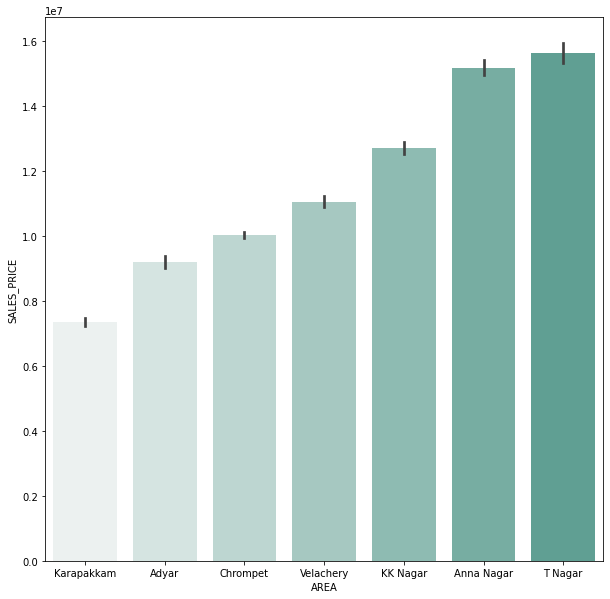

In [120]:
#Area vs Target(Sales price)

plt.figure(figsize=(10,10))
ord = data.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']
sns.barplot(x=data['AREA'],y=data['SALES_PRICE'],palette='light:#5A9',order=ord)

From the dataset Area va Target(sales_price) has linear relationship
hence do label encoding

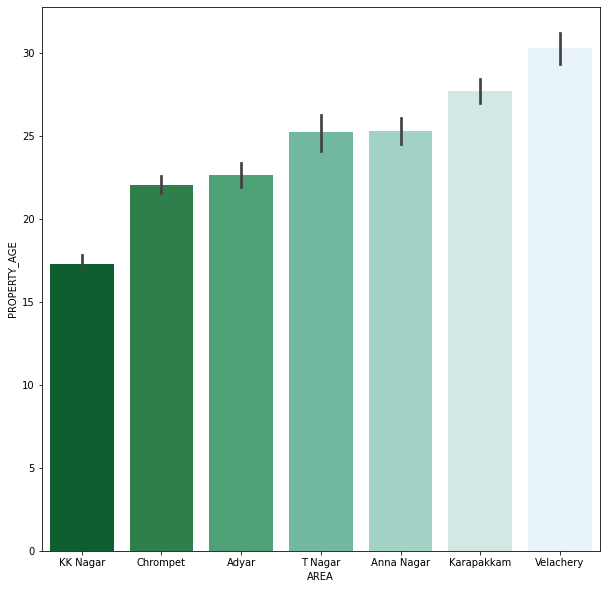

In [121]:
#AREA vs PROPERTY AGE
plt.figure(figsize=(10,10))
ord = data.groupby('AREA')['PROPERTY_AGE'].mean().reset_index().sort_values('PROPERTY_AGE')['AREA']
sns.barplot(x=data['AREA'],y=data['PROPERTY_AGE'],order = ord, palette = 'BuGn_r')

From the above plot, we can infer that buildings in velachery has highest property age and buildings in KK Nagar has lowest property age.

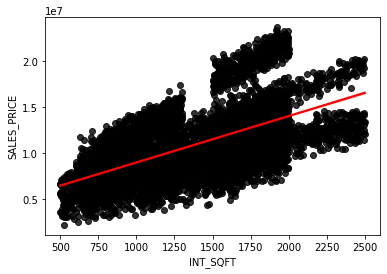

In [122]:
#INT_SQFT vs TARGET
sns.regplot(x=data['INT_SQFT'],y=data['SALES_PRICE'],scatter_kws={"color": "black"}, line_kws={"color": "red"})


From the above plot we can interpret that features INT_SQFT AND SALES_PRICES has linear relationship

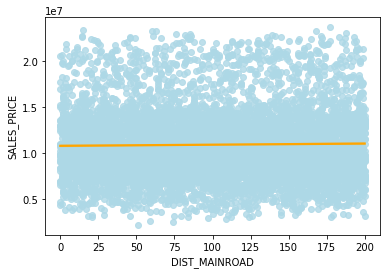

In [123]:
#DIST_MAINROAD VS TARGET
sns.regplot(x=data['DIST_MAINROAD'],y=data['SALES_PRICE'],scatter_kws={"color": "lightblue"}, line_kws={"color": "orange"})

There is no linear relationship between DIST_MAINROAD and SALES_PRICE

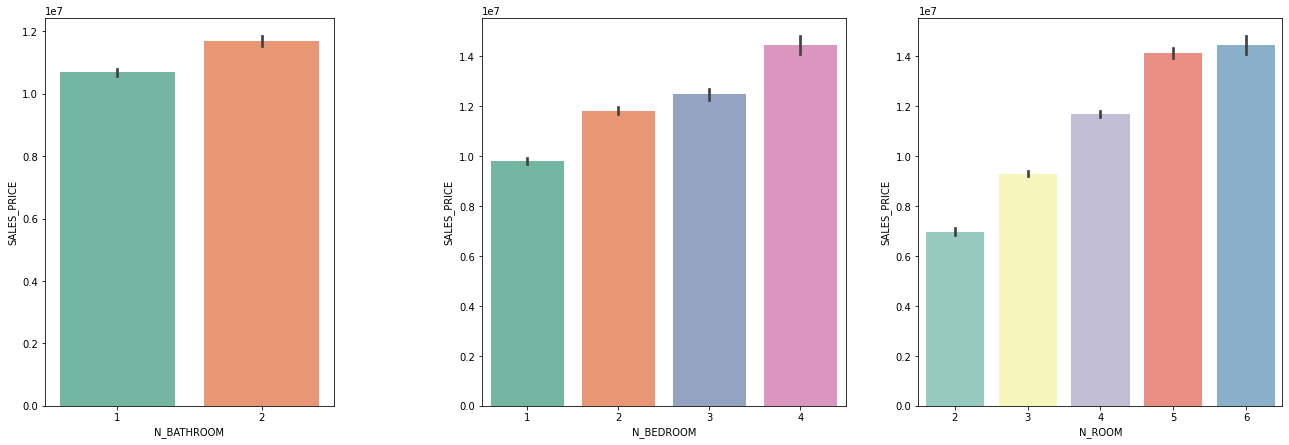

In [124]:
plt.figure(figsize=(30,50))
plt.subplot(6,5,1)
sns.barplot(x=data['N_BATHROOM'],y=data['SALES_PRICE'],palette ='Set2')
plt.subplot(6,4,2)
sns.barplot(y=data['SALES_PRICE'],x=data['N_BEDROOM'],palette ='Set2' )
plt.subplot(6,4,3)
sns.barplot(x=data['N_ROOM'],y=data['SALES_PRICE'],palette ='Set3')

From the above plot, we interpret that N_BATHROOM, N_BEDROOM, N_ROOM features have linear relationship with SALES_PRICE feature

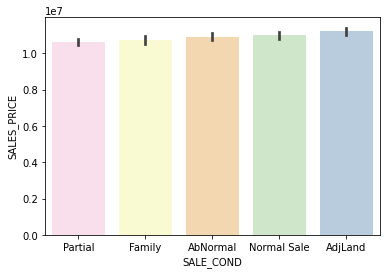

In [125]:
#SALE_COND vs TARGET
ord = data.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']
sns.barplot(x=data['SALE_COND'],y=data['SALES_PRICE'],order = ord,palette = 'Pastel1_r')

SALE_COND has no linear relationship with SALES_PRICE



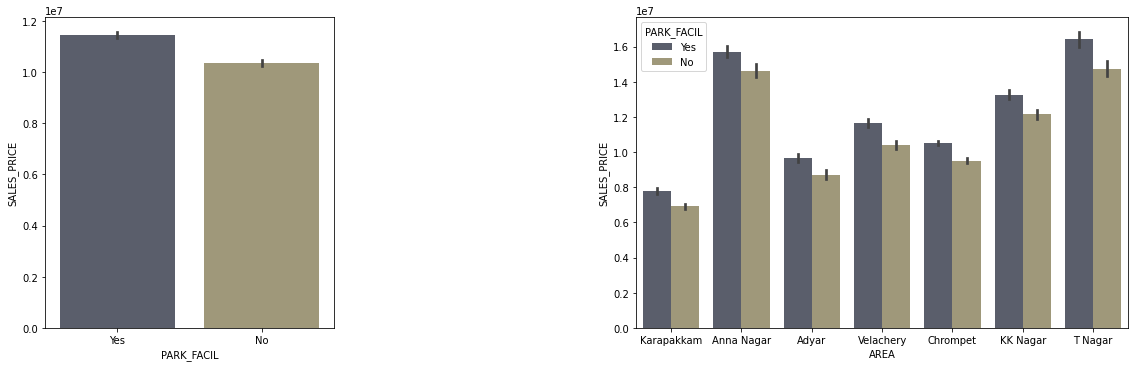

In [126]:
#PARK_FACIL VS TARGET
plt.figure(figsize=(30,40))
plt.subplot(6,5,1)
sns.barplot(x=data['PARK_FACIL'],y=data['SALES_PRICE'],palette ='cividis')
plt.subplot(6,3,2)
sns.barplot(x=data['AREA'],y=data['SALES_PRICE'],hue=data['PARK_FACIL'],palette='cividis')



1.   PARK_FACIL has linear relationship with SALES_PRICE 
2.   Do label encoding





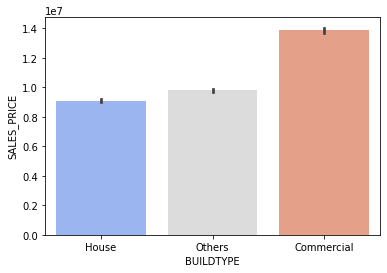

In [127]:

ord = data.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE']
sns.barplot(x=data['BUILDTYPE'],y=data['SALES_PRICE'],order=ord,palette = 'coolwarm')



1.   BUILD_TYPE has linear relationship with SALES_PRICE




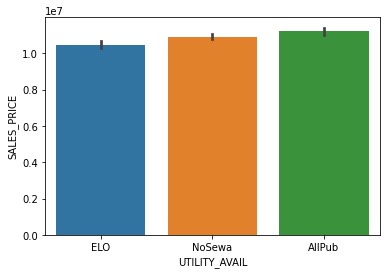

In [128]:
ord = data.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']
sns.barplot(x=data['UTILITY_AVAIL'],y=data['SALES_PRICE'],order = ord)

UTILITY_AVAIL has linear relationship with SALES_PRICE

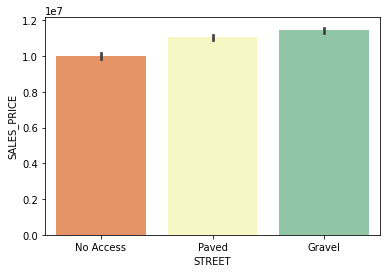

In [129]:

ord = data.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']
sns.barplot(x=data['STREET'],y=data['SALES_PRICE'],order=ord, palette = 'Spectral')

STREET has linear relationship with SALES_PRICE

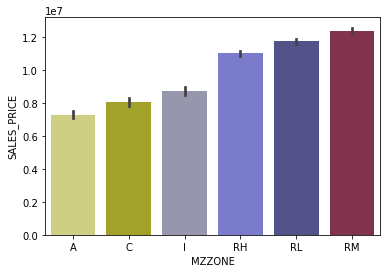

In [130]:
ord = data.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE']
sns.barplot(x=data['MZZONE'],y=data['SALES_PRICE'],order = ord,palette = 'gist_stern_r')

MZZONE has linear relationship with SALES_PRICE

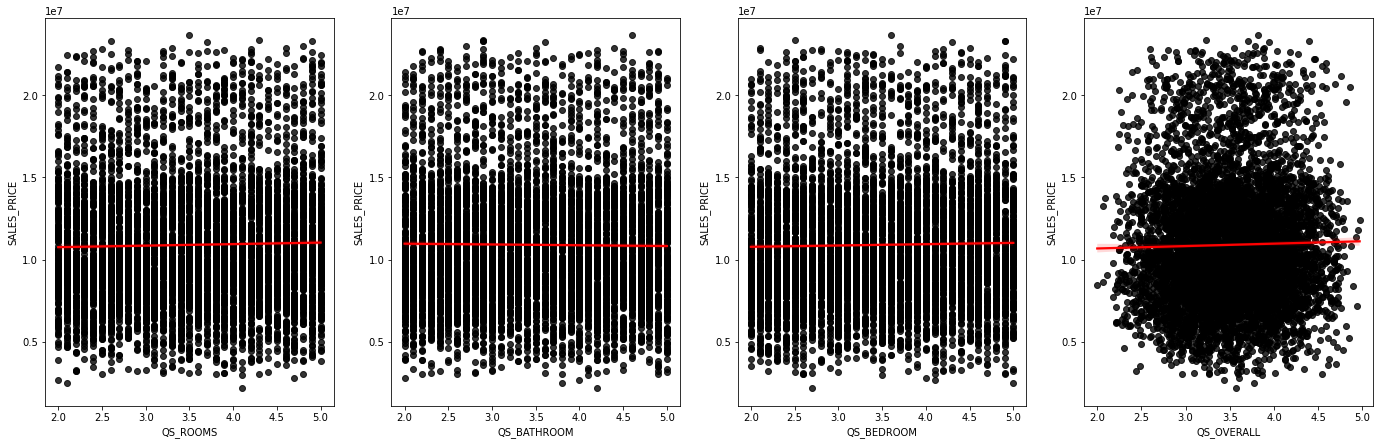

In [131]:
plt.figure(figsize=(30,50))
plt.subplot(6,5,1)
sns.regplot(x=data['QS_ROOMS'],y=data['SALES_PRICE'],scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.subplot(6,5,2)
sns.regplot(x=data['QS_BATHROOM'],y=data['SALES_PRICE'],scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.subplot(6,5,3)
sns.regplot(x=data['QS_BEDROOM'],y=data['SALES_PRICE'],scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.subplot(6,5,4)
sns.regplot(x=data['QS_OVERALL'],y=data['SALES_PRICE'],scatter_kws={"color": "black"}, line_kws={"color": "red"})


QS_ROOMS,QS_BATHROOM,QS_BEDROOM and QS_OVERALL has no linear relationship with SALES_PRICE

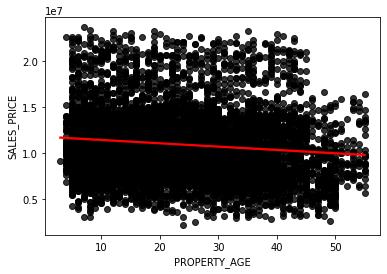

In [132]:
#PROPERTY_AGE vs SALES_PRICE
sns.regplot(x=data['PROPERTY_AGE'],y=data['SALES_PRICE'],scatter_kws={"color": "black"}, line_kws={"color": "red"})

From the plot the feature PROPERTY_AGE has some relation with the SALES_PRICE hence we keep it 

**SUMMARY**

*   Features such as SALE_COND,DIST_MAINROAD,QS_ROOMS,QS_BEDROOM, QS_BATHROOM ans QS_OVERALL has no relation with SALES_PRICE(target) so we drop all those features.
*   AREA, PARK_FACIL, UTILITY_AVAIL, STREET, MZZONE features has linear ordinal relation so we perform label encoding.
*   In BUILD_TYPE we cant linear relation so we perform One Hot Encoding.




**Drop unnecessary Feature Columns**

In [133]:
data=data.drop(['SALE_COND','QS_ROOMS','QS_BEDROOM','QS_BATHROOM','QS_OVERALL'],axis=1)

In [134]:
data=data.drop(['DIST_MAINROAD'],axis=1)

In [135]:
data.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE',
       'PROPERTY_AGE'],
      dtype='object')

**ENCODING**

**Label Encoding**

In [136]:
data['AREA'] = data['AREA'].map({'Karapakkam':1,'Anna Nagar':6,'Adyar':2,'Velachery':4,'Chrompet':3,'KK Nagar':5,'T Nagar':7})
data['PARK_FACIL'] = data['PARK_FACIL'].map({'Yes':1,'No':0})
data['UTILITY_AVAIL'] = data['UTILITY_AVAIL'].map({'AllPub':3,'ELO':1,'NoSewa':2})
data['STREET'] = data['STREET'].map({'Paved':4,'Gravel':3,'No Access':1})
data['MZZONE'] = data['MZZONE'].map({'A':1,'C':2,'I':3,'RH':5,"RL":6,'RM':7})

In [137]:
data.head(5)

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,PROPERTY_AGE
0,1,1004,1,1,3,1,Commercial,3,4,1,7600000,44
1,6,1986,2,1,5,0,Commercial,3,3,5,21717770,11
2,2,909,1,1,3,1,Commercial,1,3,6,13159200,20
3,4,1855,3,2,5,0,Others,2,4,3,9630290,22
4,1,1226,1,1,3,1,Others,3,3,2,7406250,30


**One Hot Encoding**

In [138]:
data = pd.get_dummies(data,columns=['BUILDTYPE'])
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,PROPERTY_AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,1,1,3,1,3,4,1,7600000,44,1,0,0
1,6,1986,2,1,5,0,3,3,5,21717770,11,1,0,0
2,2,909,1,1,3,1,1,3,6,13159200,20,1,0,0
3,4,1855,3,2,5,0,2,4,3,9630290,22,0,0,1
4,1,1226,1,1,3,1,3,3,2,7406250,30,0,0,1


In [139]:
data.shape

(7109, 14)

**MODEL TRAINING**

**LINEAR REGRESSION**

In [140]:
x = data.drop('SALES_PRICE',axis=1).values
y = data['SALES_PRICE'].values

Splitting of Data

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Scaling of Data

In [142]:
scaler = StandardScaler()
scaler.fit(x_train)
X_train_scaled = scaler.transform(x_train) 
X_test_scaled = scaler.transform(x_test) 

Model Training

In [143]:
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [144]:
y_pred = regressor.predict(X_test_scaled)
y_pred

array([ 9262062.43454459, 13745134.43454459, 13796334.43454459, ...,
       13701614.43454459, 17947118.43454459, 12823022.43454459])

Evaluation Metric

In [145]:
linreg_Score =  metrics.r2_score(y_test,y_pred)
print('R2- SCORE:', linreg_Score)

R2- SCORE: 0.9139215544087258


**KNN REGRESSOR**

In [146]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsRegressor(i) 
  knn.fit(X_train_scaled,y_train) 
  print("K value  : " , i, " train score : ", knn.score(X_train_scaled,y_train) , " score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))

K value  :  1  train score :  0.9999965373591768  score :  0.9354605211420506
K value  :  2  train score :  0.9842569665623611  score :  0.9473690526363339
K value  :  3  train score :  0.9774955592138604  score :  0.9505176312116234
K value  :  4  train score :  0.9732759056054388  score :  0.9506759027685175
K value  :  5  train score :  0.9696979134962472  score :  0.950184237499586
K value  :  6  train score :  0.9667688554776454  score :  0.9489735043908241
K value  :  7  train score :  0.9642640730074752  score :  0.9476609384364993
K value  :  8  train score :  0.961570637511895  score :  0.946287608086962
K value  :  9  train score :  0.9592676752376517  score :  0.9451379901580115
K value  :  10  train score :  0.957461125634857  score :  0.9442087528666491
K value  :  20  train score :  0.9424076976907795  score :  0.9322484346062374
K value  :  50  train score :  0.9136364761102761  score :  0.9049400086280187


In [147]:
knn = KNeighborsRegressor(3)
knn.fit(X_train_scaled,y_train)
y_predi = knn.predict(X_test_scaled)
print("Train Accuracy : ", knn.score(X_train_scaled,y_train))
print("Val Accuracy : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=5)))

Train Accuracy :  0.9774955592138604
Val Accuracy :  0.9473731297595915


Evaluation Metric

In [148]:
KNN_Score =  metrics.r2_score(y_test,y_predi)
print('R2- SCORE:', KNN_Score)

R2- SCORE: 0.9527458860660639


**Decision Tree**

In [149]:
dt = DecisionTreeRegressor()

# Fit dt to the training set
dt.fit(X_train_scaled, y_train) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
y_predict = dt.predict(X_test_scaled)
y_predict

array([ 9077550., 12430300., 13957390., ..., 13267150., 22829130.,
       13180400.])

In [150]:
DT_Score = metrics.r2_score(y_test,y_predict)
print('R2- SCORE:', DT_Score)

R2- SCORE: 0.9727489379334897


**Random Forest**

In [157]:
rf = RandomForestRegressor(n_estimators= 100, max_depth = 10, max_features='sqrt')
rf.fit(X_train_scaled,y_train);
predictions = rf.predict(X_test_scaled)

In [158]:
RF_Score = metrics.r2_score(predictions,y_test)
print('R2- SCORE:', RF_Score)

R2- SCORE: 0.9779504908123242


**XG BOOST**

In [159]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) 
  model.fit(X_train_scaled,y_train) 
  model.score(X_test_scaled, y_test)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train_scaled,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train_scaled, y_train, cv=5)))

Learning rate :  0.01  Train score :  -0.4027209322441243  Cross-Val score :  -0.408401005807211
Learning rate :  0.02  Train score :  0.7428186811081436  Cross-Val score :  0.7396038104060961
Learning rate :  0.03  Train score :  0.9237054026272127  Cross-Val score :  0.921158646128364
Learning rate :  0.04  Train score :  0.9612009231194794  Cross-Val score :  0.9588474281772161
Learning rate :  0.05  Train score :  0.9733054999433279  Cross-Val score :  0.9709375125290602
Learning rate :  0.06  Train score :  0.978986682759041  Cross-Val score :  0.9771016382126229
Learning rate :  0.07  Train score :  0.9839293966662583  Cross-Val score :  0.9810649240532264
Learning rate :  0.08  Train score :  0.9864434009750569  Cross-Val score :  0.9843589532645585
Learning rate :  0.09  Train score :  0.9884033316365978  Cross-Val score :  0.9866864328138808
Learning rate :  0.1  Train score :  0.9903074648886259  Cross-Val score :  0.9882171373085107
Learning rate :  0.11  Train score :  0.99

In [160]:
model = xgb.XGBRegressor(learning_rate = 1, n_estimators=100)
model.fit(X_train_scaled,y_train) #train the model
y_predxg = model.predict(X_test_scaled)


[12:07:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [161]:
XG_Score =metrics.r2_score(y_predxg,y_test)
print('Score: ',XG_Score)


Score:  0.9941283171570742


Scores of Models

In [162]:
Scores_data = [['LinearRegression',linreg_Score],['KNN',KNN_Score],['Decision Tree',DT_Score],['Random Forest',RF_Score],['XG Boost',XG_Score]]
Score = pd.DataFrame(Scores_data,columns=['Model','R2-Score'])
Score

,Model,R2-Score
0,LinearRegression,0.913922
1,KNN,0.952746
2,Decision Tree,0.972749
3,Random Forest,0.977950
4,XG Boost,0.994128


From the above data XG Boost model gives the highest R2-Score of 0.99